In [1]:
import pandas as pd
import requests,csv
import geopandas as gpd
import matplotlib.pyplot as plt

<AxesSubplot:>

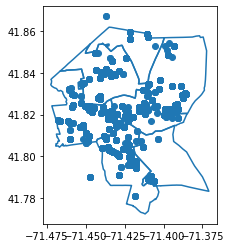

In [3]:
tix = gpd.read_file('shapefiles/Cit1021Nhood/Cit1021Nhood.shp')
neighborhoods = gpd.read_file('shapefiles/Neighborhood Boundaries/geo_export_ef027b0d-4a68-4a7f-81a6-64cd0be38041.shp')

zipcodes = gpd.read_file('shapefiles/Zip Codes/geo_export_7b90692b-83fc-4198-a66c-777f7ea4963d.shp') 
fig,ax=plt.subplots()
tix.plot(ax=ax)
zipcodes.boundary.plot(ax=ax)

In [4]:
zipcodes = zipcodes.to_crs('EPSG:4326')

/var/folders/28/4n2m2j3n3_3gt31qw5m99kkc0000gn/T/ipykernel_16106/3549241489.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'Visualizations/ticket_distribution.png',bbox='tight')


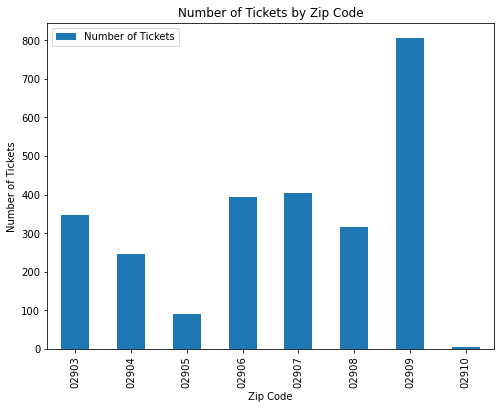

In [5]:
pivoted = tix.groupby(by='Postal').count().reset_index()
pivoted = pivoted.rename(columns={'Postal':'zip'})

# gdf = zipcodes.merge(pivoted[['zip','FID_1']], on='zip')
fig,ax=plt.subplots(figsize=(8,6))
pivoted.plot.bar(x='zip',y='FID_1',legend=True,ax=ax)
ax.legend(labels=['Number of Tickets'])
ax.set_ylabel('Number of Tickets')
ax.set_xlabel('Zip Code')
ax.set_title(f'Number of Tickets by Zip Code')
fig.savefig(f'Visualizations/ticket_distribution.png',bbox='tight')
# plt.close()

In [6]:
test = gpd.sjoin(zipcodes,tix, how='left',op='contains')
test[['zip','id']].groupby('zip').count().sort_values(by='id',ascending=False).reset_index()

,zip,id
0,02909,702
1,02907,562
2,02906,448
3,02903,358
4,02908,336
5,02905,99
6,02904,94


In [7]:
tix

,FID_1,Loc_name,Status,Score,Match_type,Match_addr,LongLabel,ShortLabel,Addr_type,Type,...,ChargeCode,Charge,Street,City_1,State,OBJECTID,LNAME,STArea__,STLength__,geometry
0,4,World,T,100.0,A,"Hamilton St, Providence, Rhode Island, 02907","Hamilton St, Providence, RI, 02907, USA",Hamilton St,StreetName,None,...,1A,OVERTIME PARKING (1A,HAMILTON ST,Providence,RI,1,Elmwood,1.914731e+07,22671.738436,POINT (-71.42053 41.79811)
1,7,World,T,100.0,A,"Hamilton St, Providence, Rhode Island, 02907","Hamilton St, Providence, RI, 02907, USA",Hamilton St,StreetName,None,...,1A,OVERTIME PARKING (1A,HAMILTON ST,Providence,RI,1,Elmwood,1.914731e+07,22671.738436,POINT (-71.42053 41.79811)
2,9,World,T,100.0,A,"Hamilton St, Providence, Rhode Island, 02907","Hamilton St, Providence, RI, 02907, USA",Hamilton St,StreetName,None,...,1A,OVERTIME PARKING (1A,HAMILTON ST,Providence,RI,1,Elmwood,1.914731e+07,22671.738436,POINT (-71.42053 41.79811)
3,15,World,T,100.0,A,"Hamilton St, Providence, Rhode Island, 02907","Hamilton St, Providence, RI, 02907, USA",Hamilton St,StreetName,None,...,1A,OVERTIME PARKING (1A,HAMILTON ST,Providence,RI,1,Elmwood,1.914731e+07,22671.738436,POINT (-71.42053 41.79811)
4,18,World,T,100.0,A,"Hamilton St, Providence, Rhode Island, 02907","Hamilton St, Providence, RI, 02907, USA",Hamilton St,StreetName,None,...,1A,OVERTIME PARKING (1A,HAMILTON ST,Providence,RI,1,Elmwood,1.914731e+07,22671.738436,POINT (-71.42053 41.79811)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,340,World,T,100.0,A,"Union Ave, Providence, Rhode Island, 02904","Union Ave, Providence, RI, 02904, USA",Union Ave,StreetName,None,...,1A,OVERTIME PARKING (1A,UNION AVE,Providence,RI,0,None,0.000000e+00,0.000000,POINT (-71.45015 41.80626)
2606,342,World,T,100.0,A,"Union Ave, Providence, Rhode Island, 02904","Union Ave, Providence, RI, 02904, USA",Union Ave,StreetName,None,...,1A,OVERTIME PARKING (1A,UNION AVE,Providence,RI,0,None,0.000000e+00,0.000000,POINT (-71.45015 41.80626)
2607,344,World,T,100.0,A,"Union Ave, Providence, Rhode Island, 02904","Union Ave, Providence, RI, 02904, USA",Union Ave,StreetName,None,...,1A,OVERTIME PARKING (1A,UNION AVE,Providence,RI,0,None,0.000000e+00,0.000000,POINT (-71.45015 41.80626)
2608,2498,World,M,100.0,A,"Verdi St, Providence, Rhode Island, 02904","Verdi St, Providence, RI, 02904, USA",Verdi St,StreetName,None,...,1A,OVERTIME PARKING (1A,VERDI ST,Providence,RI,0,None,0.000000e+00,0.000000,POINT (-71.43673 41.86707)


In [12]:
data = pd.read_csv('all_year_data.csv')
data['zip'] = '0' + data.zip.astype(str)

join_census = data.merge(pivoted[['zip','FID_1']],on='zip')

In [16]:
join_census

,Unnamed: 0,NAME,B08133_001E,B08011_001E,B08011_007E,B08133_007E,B08011_008E,B08133_008E,B08011_009E,B08133_009E,...,pct_households_min_car,pct_renter_occupied_units,pct_owner_occupied_units,pct_white,pct_nonwhite,year,zip,FID_1,min_one_car,tix_per_car_households
0,10,ZCTA5,217265.0,10106,1552,37755.0,1401,31865.0,1326,24700.0,...,95.154467,31.983079,68.016921,78.392277,21.607723,2015,02910,6,7423,0.080830
1,29,ZCTA5,287495.0,11668,1915,55285.0,1559,30610.0,1183,24860.0,...,95.697603,29.821758,70.178242,77.245723,22.754277,2019,02910,6,7785,0.077071
2,36,ZCTA5,100630.0,4978,314,9760.0,441,7065.0,673,11155.0,...,60.690254,82.656827,17.343173,67.844828,32.155172,2015,02903,347,2796,12.410587
3,71,ZCTA5,86515.0,4361,340,11240.0,531,10220.0,561,12830.0,...,60.816847,83.620506,16.379494,66.317515,33.682485,2019,02903,347,2859,12.137111
4,37,ZCTA5,364580.0,16264,1772,47960.0,1556,31750.0,2162,43450.0,...,87.319253,57.774167,42.225833,56.356866,43.643134,2015,02908,315,10749,2.930505
5,72,ZCTA5,359975.0,15134,2334,67255.0,1821,40495.0,2038,40760.0,...,85.801805,55.666860,44.333140,64.077215,35.922785,2019,02908,315,10364,3.039367
6,42,ZCTA5,275965.0,13052,1545,30370.0,1800,34670.0,1794,31160.0,...,84.246521,48.423866,51.576134,68.724336,31.275664,2015,02904,247,10717,2.304749
7,0,ZCTA5,310085.0,13345,2107,40700.0,1945,42390.0,1405,36215.0,...,83.003733,52.632833,47.367167,64.681671,35.318329,2019,02904,247,10451,2.363410
8,43,ZCTA5,405340.0,16513,1676,37025.0,1377,32500.0,2611,63555.0,...,77.389027,71.251091,28.748909,40.489790,59.510210,2015,02909,805,11524,6.985422
9,1,ZCTA5,404440.0,17372,2450,56790.0,1752,35670.0,3222,70965.0,...,81.492200,67.734877,32.265123,47.560587,52.439413,2019,02909,805,11545,6.972715


In [ ]:
# 'B08201_001E' : 'Estimate!!Total: HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
#             'B08201_002E': 'Estimate!!Total:!!No vehicle available HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
#             'B08201_003E' : 'Estimate!!Total:!!1 vehicle available HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
#             'B08201_004E': 'Estimate!!Total:!!2 vehicles available HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
#             'B08201_005E': 'Estimate!!Total:!!3 vehicles available HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
#             'B08201_006E': 'Estimate!!Total:!!4 or more vehicles available HOUSEHOLD SIZE BY VEHICLES AVAILABLE',

In [13]:
join_census['min_one_car'] = join_census.B08201_003E + join_census.B08201_004E + join_census.B08201_005E + join_census.B08201_006E

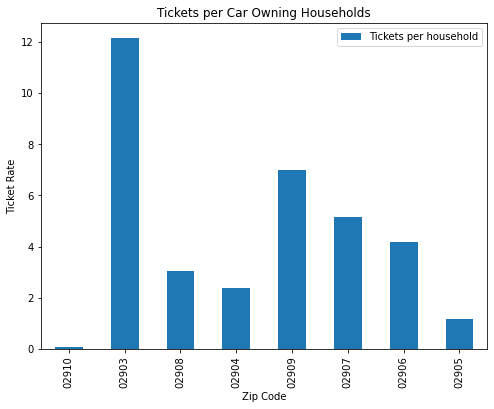

In [22]:
join_census['Tickets per household'] = (join_census.FID_1/join_census.min_one_car) * 100

# join_census.loc[join_census.year==2019].plot(kind='bar',x='zip',y='Tickets per household')

fig,ax = plt.subplots(1,figsize=(8,6))
join_census.loc[join_census.year==2019].plot(x="zip", y="Tickets per household", kind="bar",figsize=(8,6),ax=ax)
ax.legend(labels=['Tickets per household'])
ax.set_title(f"Tickets per Car Owning Households")
ax.set_ylabel('Ticket Rate')
ax.set_xlabel('Zip Code')
fig.savefig(f'Visualizations/tickets_per_households.png')
# plt.close()